In [2]:
import numpy as np

In [3]:
n = 100
x = np.linspace(10,100,n)
e = np.random.normal(0, 20, x.shape[0])
y = 3 * x + e

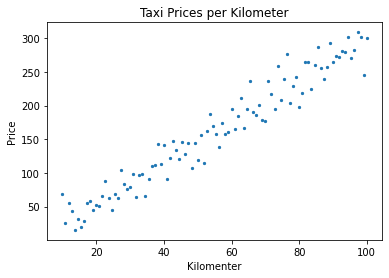

In [4]:
import matplotlib.pyplot as plt

# make the plot
plt.scatter(x,y, s=5)
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
plt.show()

In [5]:
m_array = np.linspace(2,4,50)

cost_list = []
for m in m_array:
    squared_residuals = (x * m - y)**2
    sum_of_squared_residuals = np.sum(squared_residuals, axis=0)
    cost = 1 / n * sum_of_squared_residuals
    cost_list.append(cost)

# find minimal cost index
index = np.argmin(cost_list)
# save the m with the lowest cost
m_best = m_array[index]

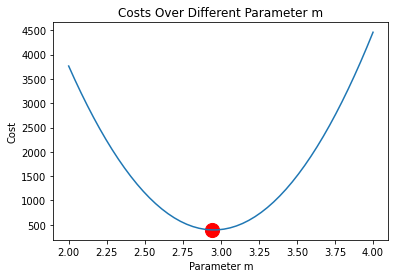

In [6]:
# Plot Cost over m's
plt.plot(m_array, cost_list)
# Plot minimal cost as a red dot
plt.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
# axis naming
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')
plt.show()

In [21]:
m_array

array([2.        , 2.04081633, 2.08163265, 2.12244898, 2.16326531,
       2.20408163, 2.24489796, 2.28571429, 2.32653061, 2.36734694,
       2.40816327, 2.44897959, 2.48979592, 2.53061224, 2.57142857,
       2.6122449 , 2.65306122, 2.69387755, 2.73469388, 2.7755102 ,
       2.81632653, 2.85714286, 2.89795918, 2.93877551, 2.97959184,
       3.02040816, 3.06122449, 3.10204082, 3.14285714, 3.18367347,
       3.2244898 , 3.26530612, 3.30612245, 3.34693878, 3.3877551 ,
       3.42857143, 3.46938776, 3.51020408, 3.55102041, 3.59183673,
       3.63265306, 3.67346939, 3.71428571, 3.75510204, 3.79591837,
       3.83673469, 3.87755102, 3.91836735, 3.95918367, 4.        ])

Text(0.5, 1.0, 'Costs Over Different Parameter m')

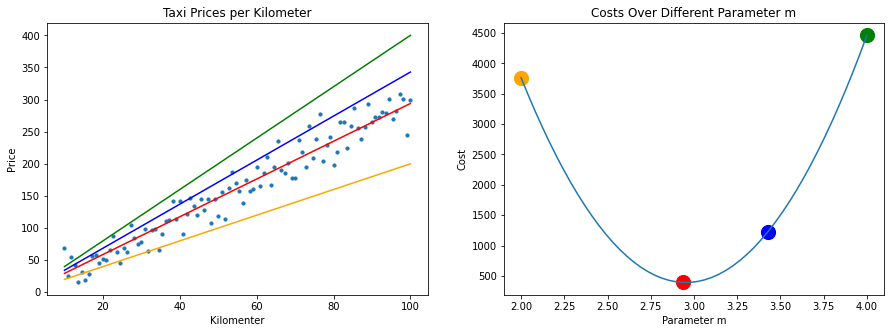

In [29]:
fig = plt.figure(figsize=(15,5)) 
ax = fig.add_subplot(121) 
ax.plot(x,x*m_best, c='red')
ax.plot(x,m_array[0]*x,c='orange')
ax.plot(x,m_array[-1]*x,c='green')
ax.plot(x,m_array[-15]*x,c='blue')
ax.scatter(x,y, s=10)
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
ax = fig.add_subplot(122)
ax.plot(m_array, cost_list)
ax.scatter(m_best, cost_list[index],marker='o', c='red', s=200)
ax.scatter(m_array[0], cost_list[0],marker='o', c='orange', s=200)
ax.scatter(m_array[-1], cost_list[-1],marker='o', c='green', s=200)
ax.scatter(m_array[-15], cost_list[-15],marker='o', c='blue', s=200)
plt.ylabel('Cost')
plt.xlabel('Parameter m')
plt.title('Costs Over Different Parameter m')

In [30]:
# predict value with linear regression
y_prediction = x * m_best

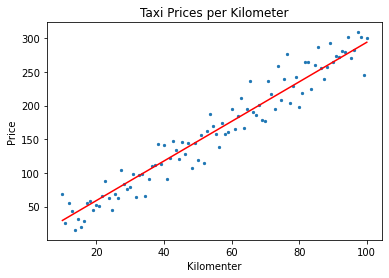

In [31]:
# make the plot
plt.scatter(x,y, s=5)
# plot the model
plt.plot(x,y_prediction, c='red')
# axis naming
plt.title('Taxi Prices per Kilometer')
plt.ylabel('Price')
plt.xlabel('Kilomenter')
plt.show()

In [22]:
from tensorflow.keras.datasets import mnist

# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


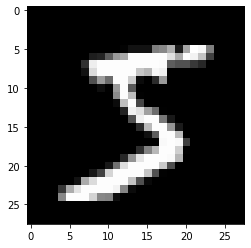

This picture is labelled as number:  5


In [23]:
# Plot the first image from the training data
plt.imshow(X_train[0], cmap='gray')
plt.show()
# Check if the number is correctly labled
print('This picture is labelled as number: ', y_train[0])

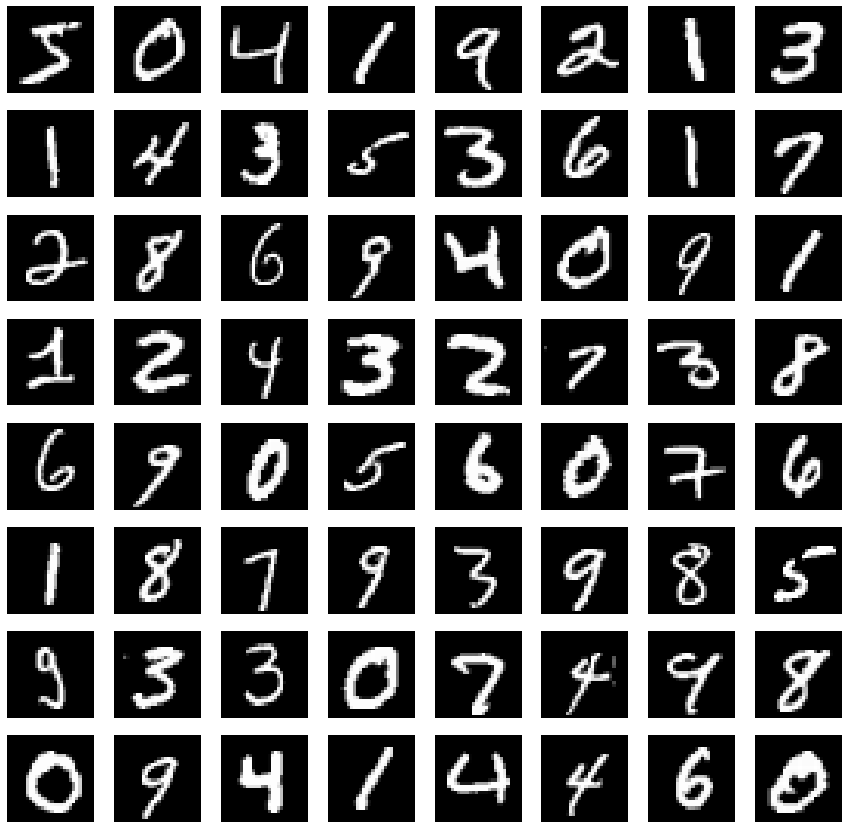

In [24]:
nrow = 8
ncol = 8
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(15)
fig.set_figwidth(15)
axs = _axs.flatten()
for i in range(nrow * ncol):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].axis('off')

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(60000, 28 * 28))

In [27]:
mnist_pca = PCA(n_components=2)
pc = mnist_pca.fit_transform(X_train_scaled)
pc.shape

(60000, 2)

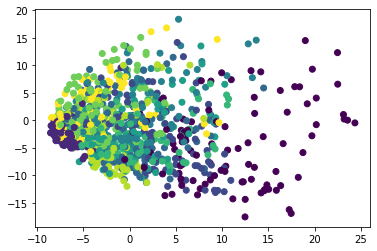

In [28]:
plt.scatter(pc[:1000,0],pc[:1000,1], c=y_train[:1000])

In [29]:
import tensorflow as tf

print("Num GPUs Available: ", 
len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [30]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Preparing Data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

n_classes = 10

Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a MLP
model = Sequential()
model.add(Dense(n_classes, input_shape=(784,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6768 - accuracy: 0.8305 - val_loss: 0.3830 - val_accuracy: 0.9015
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3622 - accuracy: 0.9022 - val_loss: 0.3218 - val_accuracy: 0.9130
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3197 - accuracy: 0.9123 - val_loss: 0.2955 - val_accuracy: 0.9188
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2996 - accuracy: 0.9168 - val_loss: 0.2855 - val_accuracy: 0.9213
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2879

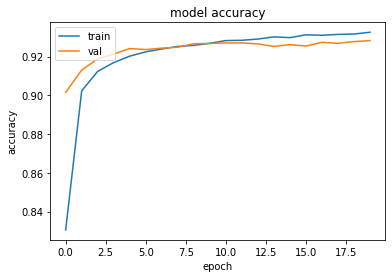

In [31]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()